In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Discretize the system using Forward Euler with a time step of δt = 0.1
def forward_euler(x, y, f_x, f_y, theta, delta=0.1):
    x_prime = f_x(x, y, theta)
    y_prime = f_y(x, y, theta)
    return x + delta * x_prime, y + delta * y_prime

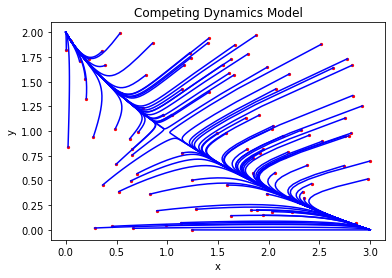

In [4]:
# Competing dynamics model
def Q1():
    def f_x(x, y, theta):
        return (3 - x - 2*y) * x
    
    def f_y(x, y, theta):
        return (2 - y - x) * y
    
    # Generate 100 random starting points and plot them
    x_initials = np.random.uniform(0, 3, 100)
    y_initials = np.random.uniform(0, 2, 100)
    plt.scatter(x_initials, y_initials, s=5, c='r')

    # Simulate the evolution of each state over time
    for i in range(100):
        xs = [x_initials[i]]
        ys = [y_initials[i]]
        for j in range(100):
            x, y = forward_euler(xs[-1], ys[-1], f_x, f_y, theta=None)
            xs.append(x)
            ys.append(y)
        plt.plot(xs, ys, c='b')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Competing Dynamics Model')
    plt.show()

Q1()

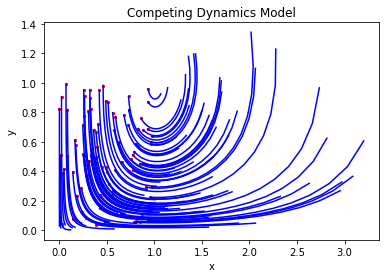

In [5]:
# Classic predator-prey model
def Q2(theta=2):
    def f_x(x, y, theta):
        return (1 - y) * x
    
    def f_y(x, y, theta):
        return theta * (x - 1) * y
    
    # Generate 100 random starting points and plot them
    x_initials = np.random.uniform(0, 1, 100)
    y_initials = np.random.uniform(0, 1, 100)
    plt.scatter(x_initials, y_initials, s=5, c='r')

    # Simulate the evolution of each state over time
    for i in range(100):
        xs = [x_initials[i]]
        ys = [y_initials[i]]
        for j in range(15):
            x, y = forward_euler(xs[-1], ys[-1], f_x, f_y, theta)
            xs.append(x)
            ys.append(y)
        plt.plot(xs, ys, c='b')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Competing Dynamics Model')
    plt.show()

Q2()

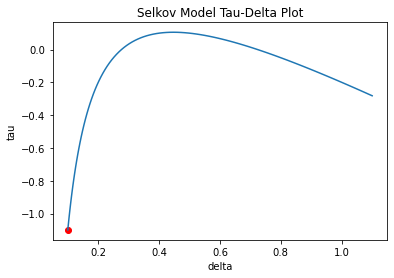

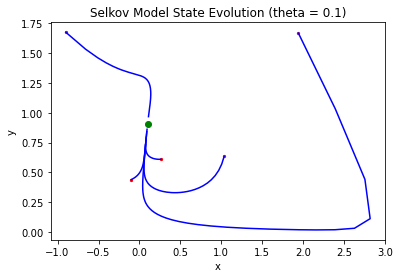

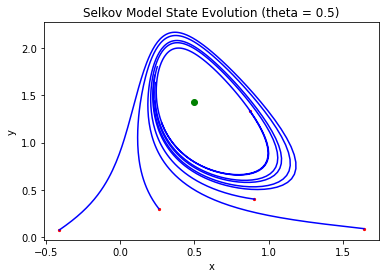

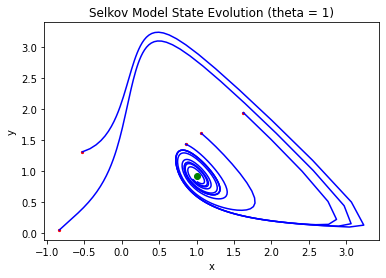

In [6]:
# Selkov model
def Q3a():
    def tau_delta(theta):
        # Find the fixed point as a function of theta
        x = theta
        y = theta / (0.1 + theta**2)

        # The linearized system at the fixed point
        A = [[-1 + 2*x*y, 0.1 + x**2], 
             [-2*x*y, -0.1 - x**2]]
        
        # The behaviour of the linearized system
        trace = A[0][0] + A[1][1]
        det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
        return x, y, trace, det
                
    # Numerically evaluate tau and delta as theta varies between 0 to 1
    thetas = np.linspace(0, 1, 101)
    taus = []
    deltas = []
    for theta in thetas:
        _, _, tau, delta = tau_delta(theta)
        taus.append(tau)
        deltas.append(delta)
        # print(f"theta: {theta:.3f}, tau: {tau:.3f}, delta: {delta:.3f}, tau^2 - 4*delta: {tau**2 - 4*delta:.3f}")

    plt.scatter(deltas[0], taus[0], c='r')
    plt.plot(deltas, taus)
    plt.xlabel('delta')
    plt.ylabel('tau')
    plt.title('Selkov Model Tau-Delta Plot')
    plt.show()

    # Based on the tau-delta plot, find the ranges of theta corresponding to unique types of behaviour from the system
    def plot_state_evolution(theta, fixed_x, fixed_y):
        def f_x(x, y, theta):
            return -x + 0.1*y + x**2 * y
        
        def f_y(x, y, theta):
            return theta - 0.1*y - x**2 * y
        
        # Generate 100 random starting points and plot them
        x_initials = np.random.uniform(-1, 2, 5)
        y_initials = np.random.uniform(0, 2, 5)
        plt.scatter(x_initials, y_initials, s=5, c='r')

        # Simulate the evolution of each state over time
        for i in range(5):
            xs = [x_initials[i]]
            ys = [y_initials[i]]
            for j in range(150):
                x, y = forward_euler(xs[-1], ys[-1], f_x, f_y, theta)
                xs.append(x)
                ys.append(y)
            plt.plot(xs, ys, c='b')

        plt.scatter(fixed_x, fixed_y, c='g')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Selkov Model State Evolution (theta = {theta})')
        plt.show()

    for theta in [0.1, 0.5, 1]:
        x, y, _, _ = tau_delta(theta)
        plot_state_evolution(theta, x, y)

Q3a()